___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [ ]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print('---' * 25)

RowNumber : [    1     2     3 ...  9998  9999 10000]
---------------------------------------------------------------------------
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------------------------------------------------------------------------
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------------------------------------------------------------------------
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 

In [ ]:
df = df.iloc[:, 3:]

In [ ]:
df.sample(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7667,797,France,Male,29,1,0.000,1,0,1,149991.320,0


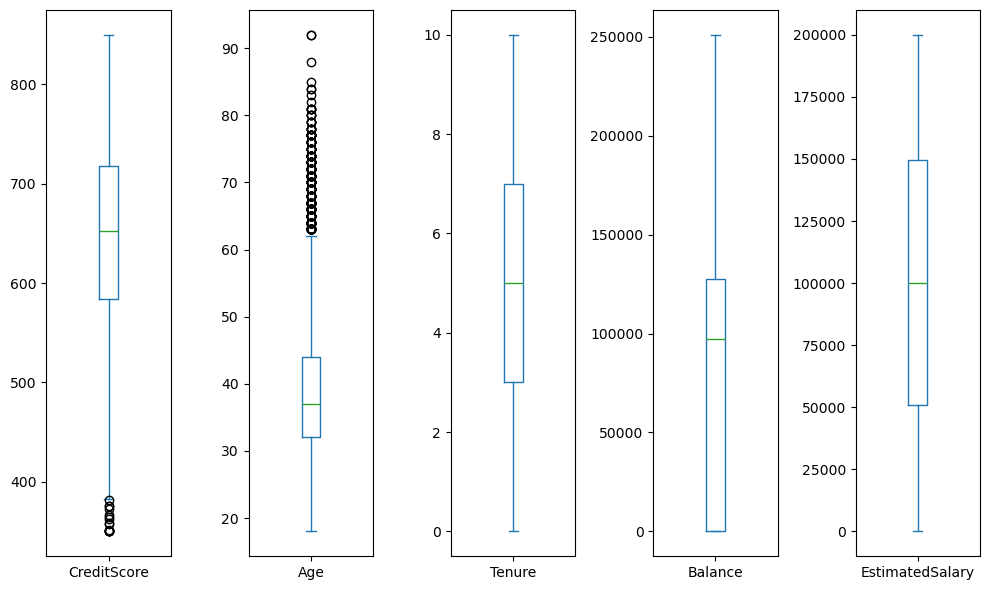

In [ ]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

df[cols].plot(kind='box', subplots=True, figsize=(10,6))
plt.tight_layout()
plt.show()

In [ ]:
df[df.CreditScore < 400]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
942,376,France,Female,46,6,0.000,1,1,0,157333.690,1
1193,363,Spain,Female,28,6,146098.430,3,1,0,100615.140,1
1201,399,Germany,Male,46,2,127655.220,1,1,0,139994.680,1
1405,359,France,Female,44,6,128747.690,1,1,0,146955.710,1
1631,350,Spain,Male,54,1,152677.480,1,1,1,191973.490,1
1838,350,Germany,Male,39,0,109733.200,2,0,0,123602.110,1
1962,358,Spain,Female,52,8,143542.360,3,1,0,141959.110,1
2473,351,Germany,Female,57,4,163146.460,1,1,0,169621.690,1
2579,365,Germany,Male,30,0,127760.070,1,1,0,81537.850,1


In [ ]:
df[df.Age > 80]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
766,700,France,Female,82,2,0.000,2,0,1,182055.360,0
2458,513,Spain,Male,88,10,0.000,2,1,1,52952.240,0
3033,787,France,Female,85,10,0.000,2,1,1,116537.960,0
3387,537,Germany,Male,84,8,92242.340,1,1,1,186235.980,0
3531,408,France,Female,84,8,87873.390,1,0,0,188484.520,1
4931,682,Germany,Male,81,6,122029.150,1,1,1,50783.880,0
6443,753,France,Male,92,3,121513.310,1,0,1,195563.990,0
6759,705,France,Male,92,1,126076.240,2,1,1,34436.830,0
7526,850,France,Female,81,1,0.000,2,1,1,59568.240,0
7956,850,France,Male,81,5,0.000,2,1,1,44827.470,0


In [ ]:
df.groupby('Exited')['CreditScore'].mean()

Exited
0   651.853
1   645.351
Name: CreditScore, dtype: float64

In [ ]:
df.groupby('Exited')['EstimatedSalary'].mean()

Exited
0    99738.392
1   101465.678
Name: EstimatedSalary, dtype: float64

In [ ]:
df.groupby('Exited')['Balance'].mean()

Exited
0   72745.297
1   91108.539
Name: Balance, dtype: float64

In [ ]:
df[df.Balance == 0]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0
11,497,Spain,Male,24,3,0.000,2,1,0,76390.010,0
12,476,France,Female,34,10,0.000,2,1,0,26260.980,0
...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.000,2,1,1,179436.600,0
9992,726,Spain,Male,36,2,0.000,1,1,0,195192.400,0
9994,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0


In [ ]:
df[df.Balance == 0].Exited.value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [ ]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

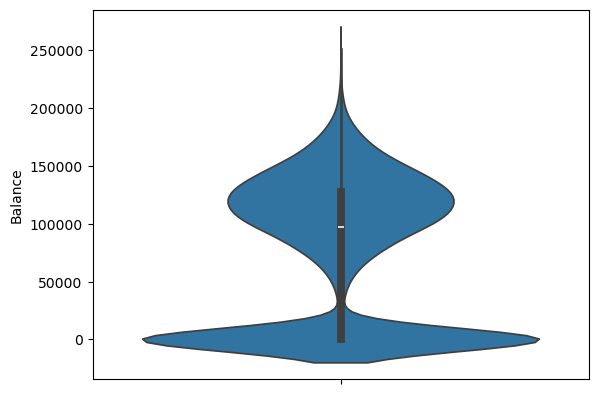

In [ ]:
sns.violinplot(data=df, y='Balance');

In [ ]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Geography'] = df.Geography.map({
    'France': 1,
    'Germany': 2,
    'Spain': 3
})

In [ ]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Gender'] = df.Gender.map({
    'Male': 1,
    'Female': 0
})

In [ ]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

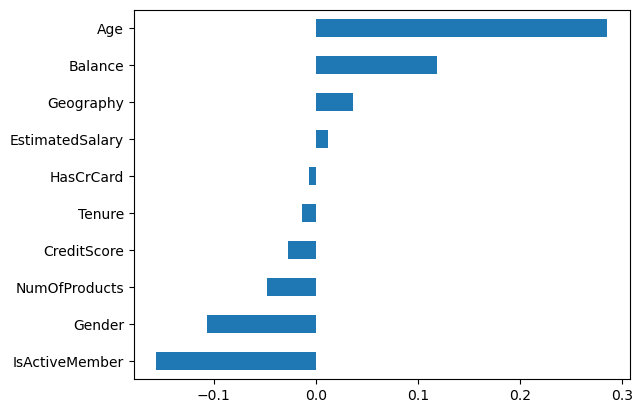

In [ ]:
df.corr(numeric_only=True)['Exited'].sort_values(ascending=True)[:-1].plot(kind='barh');

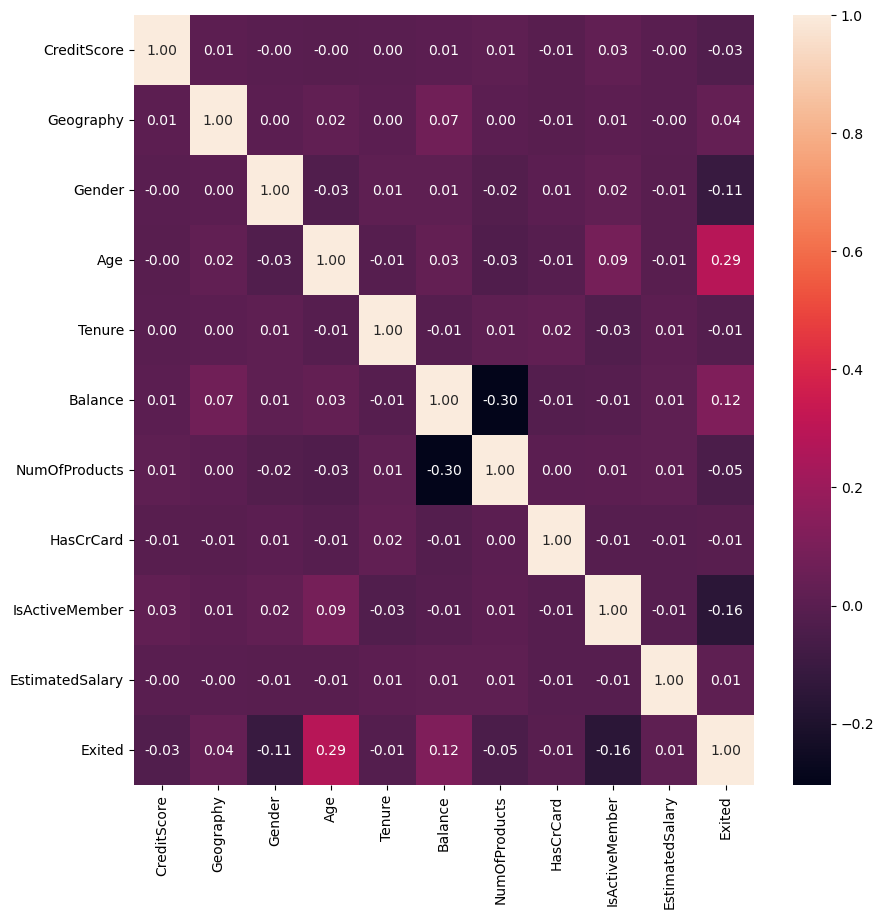

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [ ]:
df.to_csv('churn_prediction.csv', index=False)

# Preprocessing of Data
- Train | Test Split, Scalling

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df0 = pd.read_csv('churn_prediction.csv')
df0.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,42,2,0.000,1,1,1,101348.880,1
1,608,3,0,41,1,83807.860,1,0,1,112542.580,0
2,502,1,0,42,8,159660.800,3,1,0,113931.570,1
3,699,1,0,39,1,0.000,2,0,0,93826.630,0
4,850,3,0,43,2,125510.820,1,1,1,79084.100,0


In [4]:
X = df0.drop('Exited', axis=1)
y = df0.Exited

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, stratify=y_train, random_state=42
)

In [6]:
from sklearn.preprocessing import RobustScaler

In [22]:
scaler = RobustScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf

In [25]:
X_train.shape

(7650, 10)

In [26]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=500,
    verbose=1)

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7802 - loss: 0.6279 - val_accuracy: 0.7941 - val_loss: 0.4717
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4295 - val_accuracy: 0.8022 - val_loss: 0.4476
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4151 - val_accuracy: 0.8089 - val_loss: 0.4674
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4008 - val_accuracy: 0.8215 - val_loss: 0.4602
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3887 - val_accuracy: 0.8259 - val_loss: 0.4507
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3884 - val_accuracy: 0.8274 - val_loss: 0.4414
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8435 - loss: 0.3959 - val_accuracy: 0.8289 - val_loss: 0.4319
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8466 - loss: 0.3997 - val_accuracy: 0.8311 - 

In [34]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.7904558181762695
accuracy:  0.8379999995231628


In [38]:
loss_df = pd.DataFrame(model.history.history)

In [39]:
loss_df.plot()
plt.show()

TypeError: no numeric data to plot

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

In [40]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[732  64]
 [ 98 106]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.62      0.52      0.57       204

    accuracy                           0.84      1000
   macro avg       0.75      0.72      0.73      1000
weighted avg       0.83      0.84      0.83      1000



In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 36)                  │             396 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 18)                  │             666 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 9)                   │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,731 (14.58 KB)

 Trainable params: 1,243 (4.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,488 (9.72 KB)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [55]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [56]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("Unique labels in y_train:", np.unique(y_train))

X_train shape: (7650, 10)
y_train shape: (7650,)
X_val shape: (1350, 10)
y_val shape: (1350,)
Unique labels in y_train: [0 1]


In [57]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
class_weights = {0: 1.0, 1: 4.0}

model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=300,
    class_weight=class_weights,
    verbose=1)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7590 - loss: 1.4075 - val_accuracy: 0.7030 - val_loss: 0.6406
Epoch 2/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7156 - loss: 1.0272 - val_accuracy: 0.7148 - val_loss: 0.6313
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7024 - loss: 1.0056 - val_accuracy: 0.7504 - val_loss: 0.5616
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.9516 - val_accuracy: 0.7400 - val_loss: 0.5753
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7582 - loss: 0.8861 - val_accuracy: 0.7259 - val_loss: 0.5968
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7452 - loss: 0.8518 - val_accuracy: 0.7667 - val_loss: 0.5648
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7560 - loss: 0.8218 - val_accuracy: 0.7341 - val_loss: 0.6113
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.8649 - val_accuracy: 0.5615 - 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.722,1.195,0.703,0.641
1,0.713,1.000,0.715,0.631
2,0.715,0.954,0.750,0.562
3,0.720,0.929,0.740,0.575
4,0.744,0.894,0.726,0.597


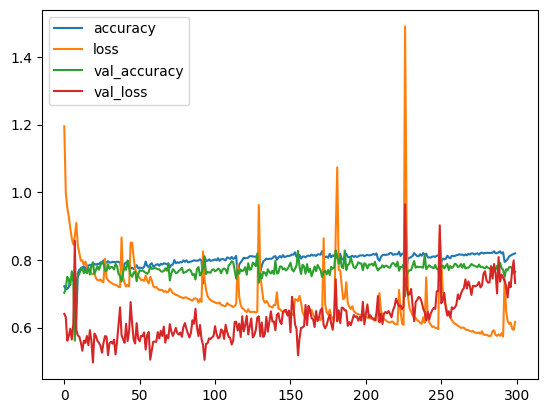

In [60]:
loss_df.plot()
plt.show()

In [62]:
X_test = np.array(X_test)
y_test = np.array(y_test)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.7475222945213318
accuracy:  0.7590000033378601


In [63]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[610 186]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.44      0.73      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.78      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [64]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.003
opt = Adam(learning_rate=learning_rate)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=500,
    class_weight=class_weights,
    verbose=1)

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.6598 - loss: 1.0482 - val_accuracy: 0.7067 - val_loss: 0.5758
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.8994 - val_accuracy: 0.7430 - val_loss: 0.5189
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - loss: 0.8326 - val_accuracy: 0.7852 - val_loss: 0.4875
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7940 - loss: 0.7647 - val_accuracy: 0.7659 - val_loss: 0.5081
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7759 - loss: 0.7535 - val_accuracy: 0.7896 - val_loss: 0.4668
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.7228 - val_accuracy: 0.8030 - val_loss: 0.4638
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.7197 - val_accuracy: 0.8156 - val_loss: 0.4357
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8003 - loss: 0.7157 - val_accuracy: 0.7963 - 

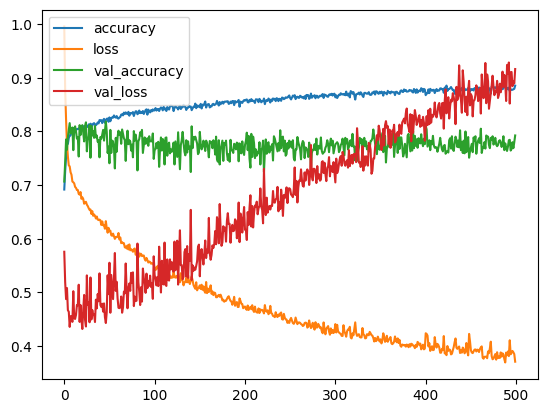

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[648 148]
 [ 64 140]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       796
           1       0.49      0.69      0.57       204

    accuracy                           0.79      1000
   macro avg       0.70      0.75      0.71      1000
weighted avg       0.82      0.79      0.80      1000



### Add Dropout Layer

In [68]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=500,
    class_weight=class_weights,
    verbose=1)

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.4919 - loss: 1.1402 - val_accuracy: 0.6252 - val_loss: 0.6604
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4716 - loss: 1.0823 - val_accuracy: 0.6541 - val_loss: 0.6315
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5213 - loss: 1.0686 - val_accuracy: 0.7000 - val_loss: 0.5957
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6411 - loss: 1.0107 - val_accuracy: 0.6978 - val_loss: 0.5883
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 1.0079 - val_accuracy: 0.7081 - val_loss: 0.5849
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6601 - loss: 1.0068 - val_accuracy: 0.7081 - val_loss: 0.5757
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6961 - loss: 0.9689 - val_accuracy: 0.7022 - val_loss: 0.5858
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.9555 - val_accuracy: 0.7422 - 

<Axes: >

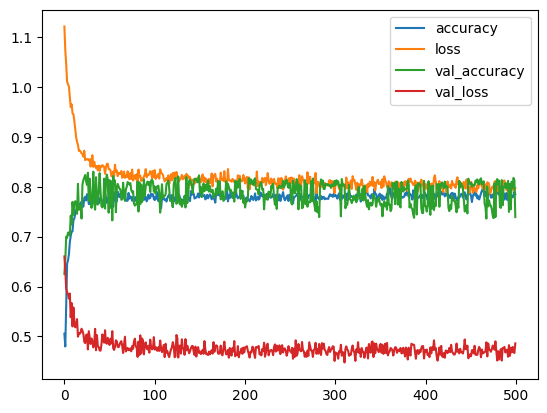

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[590 206]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       796
           1       0.44      0.78      0.56       204

    accuracy                           0.75      1000
   macro avg       0.68      0.76      0.69      1000
weighted avg       0.83      0.75      0.77      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [76]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [77]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=500,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7747 - loss: 1.0871 - val_accuracy: 0.7007 - val_loss: 0.6041
Epoch 2/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6981 - loss: 0.9543 - val_accuracy: 0.6830 - val_loss: 0.5829
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6966 - loss: 0.9024 - val_accuracy: 0.6837 - val_loss: 0.5885
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6934 - loss: 0.9026 - val_accuracy: 0.7363 - val_loss: 0.5232
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7367 - loss: 0.8331 - val_accuracy: 0.7148 - val_loss: 0.5610
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7292 - loss: 0.8340 - val_accuracy: 0.7363 - val_loss: 0.5249
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.8052 - val_accuracy: 0.7726 - val_loss: 0.4900
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.7801 - val_accuracy: 0.7719 - 

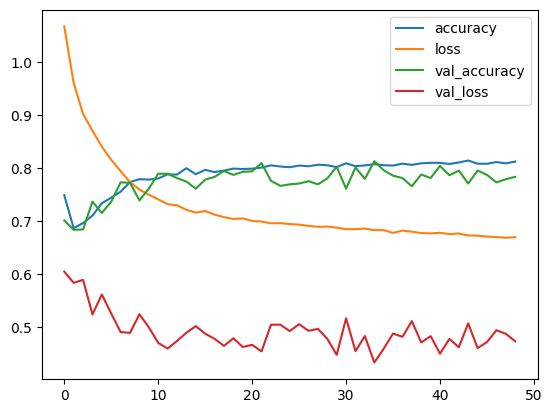

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

#### Monitor the "val_recall" as metric

In [80]:
early_stop2 = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=500,
    class_weight=class_weights,
    verbose=1,
    callbacks=[early_stop2])

Epoch 1/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.6958 - val_accuracy: 0.7970 - val_loss: 0.4547
Epoch 2/500
33/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.7029  

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.6947 - val_accuracy: 0.8044 - val_loss: 0.4485
Epoch 3/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.6662 - val_accuracy: 0.7933 - val_loss: 0.4599
Epoch 4/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8121 - loss: 0.6688 - val_accuracy: 0.7978 - val_loss: 0.4516
Epoch 5/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.6886 - val_accuracy: 0.7896 - val_loss: 0.4676
Epoch 6/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8156 - loss: 0.6605 - val_accuracy: 0.7889 - val_loss: 0.4702
Epoch 7/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.6560 - val_accuracy: 0.7719 - val_loss: 0.4943
Epoch 8/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.6681 - val_accuracy: 0.7852 - val_loss: 0.4713
Epoch 9/500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8141 - loss: 0.6514 - val_accuracy: 0.7881 - val_loss: 0.4

<Axes: >

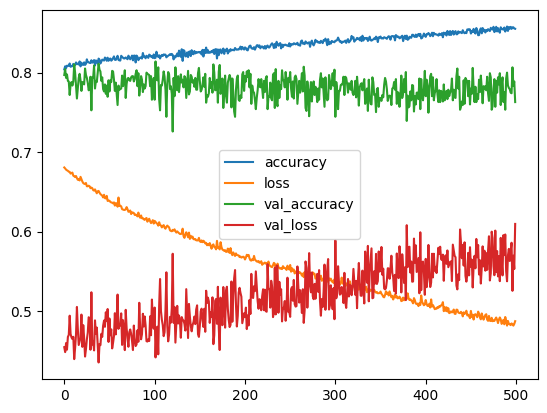

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [84]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[618 178]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       796
           1       0.45      0.73      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.78      1000



## Optuna

In [86]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00


In [90]:
import optuna
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [88]:
trial_metric = "accuracy"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
  try:
    model = create_model(trial)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score
  except Exception as e:
    print(f"Trial failed due to error: {e}")
    return None

In [91]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20, catch=(Exception,))
study.best_params

[I 2025-01-19 13:36:57,577] A new study created in memory with name: no-name-bf66cb90-8f17-4427-ba22-1213a4a606a9
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

{'n_units1': 46,
 'n_units2': 58,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.0006187795034821037}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [94]:
unit1, unit2, optimizer, lr = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"]
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

model.fit(
    X_train,
    y_train,
    validation_data =(X_val, y_val),
    batch_size=128,
    epochs=300,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - Recall: 0.3890 - loss: 1.0895 - val_Recall: 0.7055 - val_loss: 0.6500
Epoch 2/300
47/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.7453 - loss: 1.0020

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: Recall,loss,val_Recall,val_loss
  current = self.get_monitor_value(logs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7414 - loss: 0.9955 - val_Recall: 0.6909 - val_loss: 0.6074
Epoch 3/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7327 - loss: 0.9167 - val_Recall: 0.7127 - val_loss: 0.6009
Epoch 4/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7595 - loss: 0.9271 - val_Recall: 0.6618 - val_loss: 0.5487
Epoch 5/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.7387 - loss: 0.8764 - val_Recall: 0.7091 - val_loss: 0.5638
Epoch 6/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.7511 - loss: 0.8564 - val_Recall: 0.6982 - val_loss: 0.5481
Epoch 7/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.7428 - loss: 0.8443 - val_Recall: 0.6655 - val_loss: 0.5150
Epoch 8/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7440 - loss: 0.8140 - val_Recall: 0.6873 - val_loss: 0.5398
Epoch 9/300
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Recall: 0.7352 - loss: 0.8154 - val_Recall: 0.6655 - val_loss: 0.4981
Epoch 10/300
60/60 ━━━━━━━━━

<Axes: >

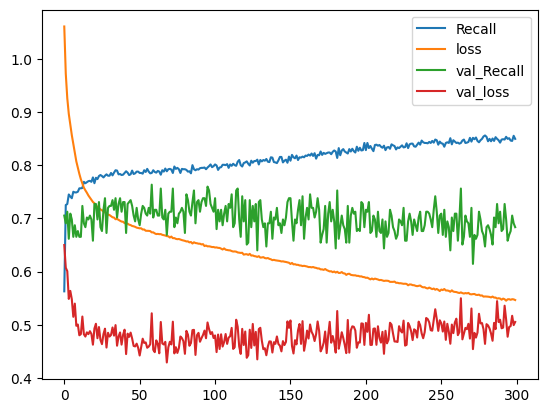

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[634 162]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.85       796
           1       0.48      0.73      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.78      0.80      1000



# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___